In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

In [389]:
file=pd.read_csv('Telco_churns.csv')
file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checando por valores duplicados / vazios

In [390]:
file.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [391]:
file.duplicated().sum()

0

##  Ao converter TotalCharges para tipo  numérico, constatou-se que existem linhas vazias nessa coluna 

In [392]:
file['TotalCharges']=pd.to_numeric(file['TotalCharges'])

ValueError: Unable to parse string " " at position 488

##  Logo, é essêncial removê-las.

In [492]:
## Existem 11 linhas vazias na base 

file.query("TotalCharges==' '")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Label


## Ajustando a base

In [394]:
file=file.query("TotalCharges!=' '")
file['TotalCharges']=pd.to_numeric(file['TotalCharges'])
file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [395]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Análise de características do usuários

In [493]:
## Como boa parte da base é formada por dados categóricos, podemos visualizar abaixo a frequência de cada um
## Para melhor visualização, essas informações serão passadas para gráficos 

file.describe(exclude="number")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen_Label
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Not Senior
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163,5890


## 50% dos usuários homens /  50% mulheres. 

PERCENTAGE %
Male      50.47
Female    49.53
Name: gender, dtype: float64


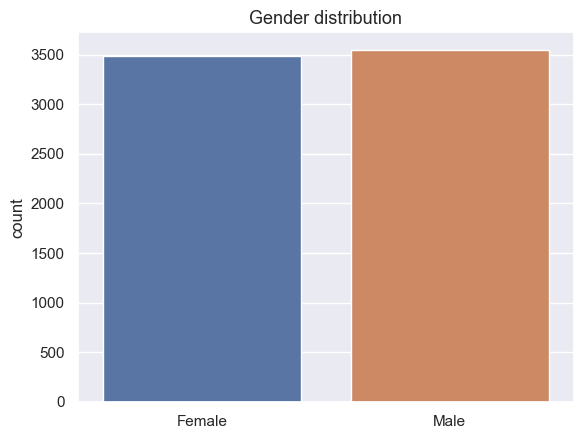

In [430]:
print("PERCENTAGE %")
print(file['gender'].value_counts(normalize=True).mul(100).round(2))
fig_1=sns.countplot(file,x=file['gender']);
fig_1.set_title("Gender distribution",fontsize=13);
fig_1.set_xlabel("");

## 70% dos usuários não possuem dependentes / 30% possui

PERCENTAGE %
No     70.15
Yes    29.85
Name: Dependents, dtype: float64


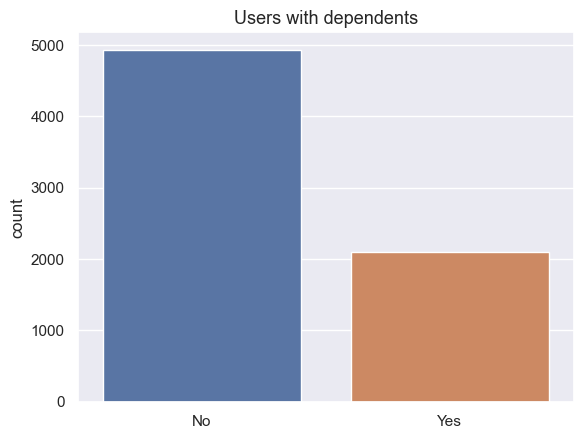

In [431]:
print("PERCENTAGE %")
print(file['Dependents'].value_counts(normalize=True).mul(100).round(2))
fig_2=sns.countplot(file,x=file['Dependents'])
fig_2.set_title("Users with dependents",fontsize=13);
fig_2.set_xlabel("");

## Dos usuários que possuem dependentes, a maioria também possui parceiro.


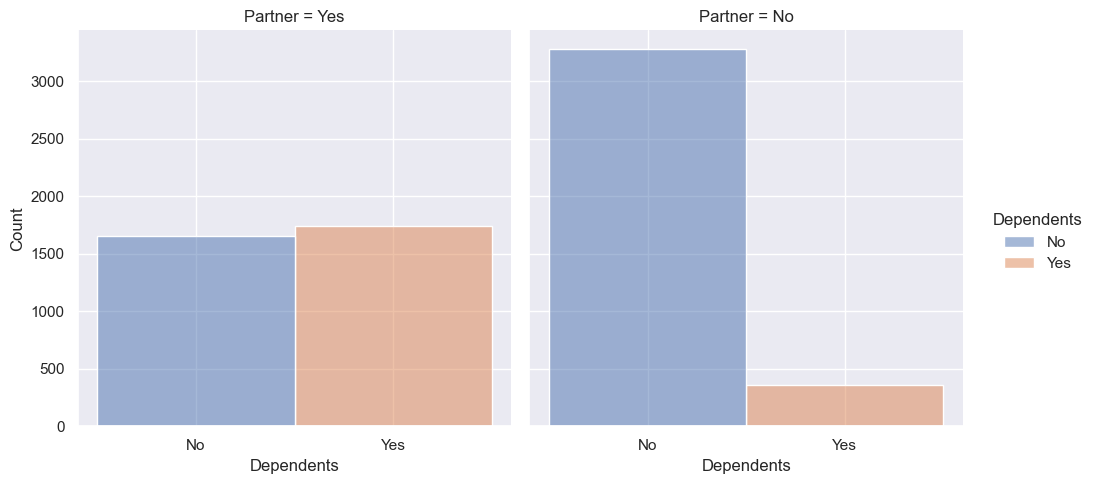

In [432]:
sns.displot(file,x=file['Dependents'],hue=file['Dependents'],col=file['Partner']);


## Cerca de 16.24% dos usuários são idosos 

PERCENTAGE %
Not Senior    83.76
Senior        16.24
Name: SeniorCitizen_Label, dtype: float64


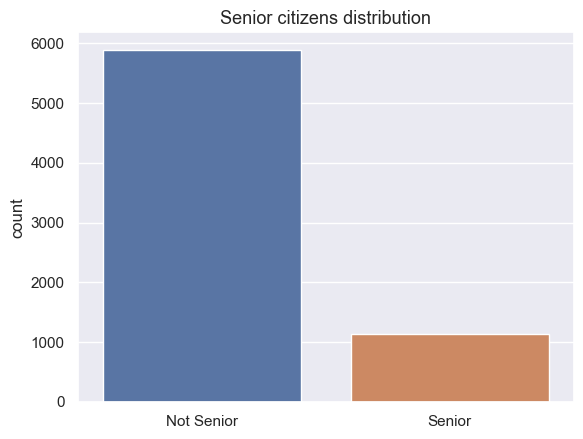

In [433]:
print("PERCENTAGE %")
file['SeniorCitizen_Label']=file['SeniorCitizen'].replace({0:"Not Senior",1:"Senior"});
print(file['SeniorCitizen_Label'].value_counts(normalize=True).mul(100).round(2))
fig_3=sns.countplot(file,x=file['SeniorCitizen_Label']);
fig_3.set_title("Senior citizens distribution",fontsize=13);
fig_3.set_xlabel("");


# Análise das escolhas feitas por usuários

## 90% dos usuários possuem serviço de telefonia

PERCENTAGE %
Yes    90.33
No      9.67
Name: PhoneService, dtype: float64


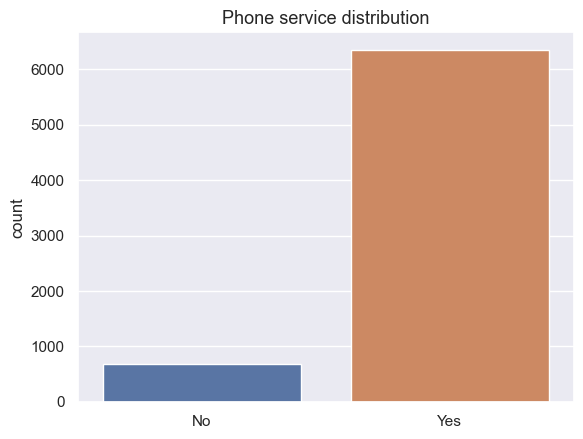

In [434]:
print("PERCENTAGE %")
print(file['PhoneService'].value_counts(normalize=True).mul(100).round(2))
fig_4=sns.countplot(file,x=file['PhoneService']);
fig_4.set_title("Phone service distribution",fontsize=13);
fig_4.set_xlabel("");


## Serviço de internet escolhido:
### 44% Opta por fibra óptica;
### 34.36% DSL;
### 21.62% não utiliza Internet.

PERCENTAGE %
Fiber optic    44.03
DSL            34.36
No             21.62
Name: InternetService, dtype: float64


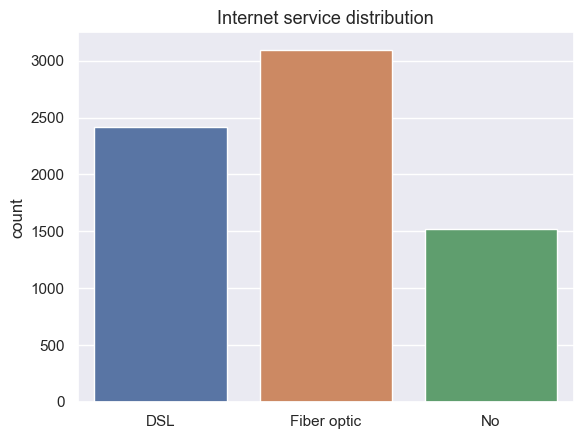

In [483]:
print("PERCENTAGE %")
print(file['InternetService'].value_counts(normalize=True).mul(100).round(2))
fig_5=sns.countplot(file,x=file['InternetService']);
fig_5.set_title("Internet service distribution",fontsize=13);
fig_5.set_xlabel("");

## 48% dos usuários não usam várias linhas telefonicas / 42% opta por utilizar

PERCENTAGE %
No                  48.14
Yes                 42.19
No phone service     9.67
Name: MultipleLines, dtype: float64


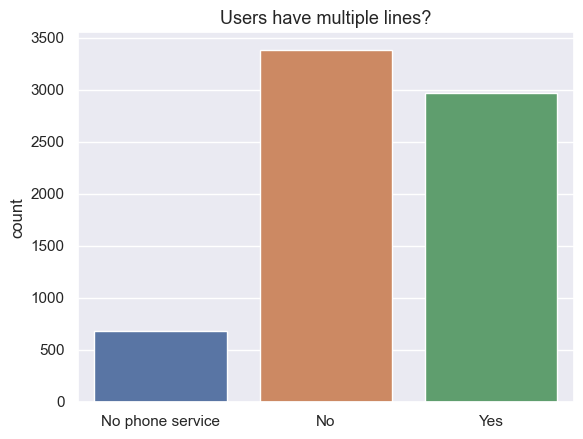

In [439]:
print("PERCENTAGE %")
print(file['MultipleLines'].value_counts(normalize=True).mul(100).round(2))
fig_6=sns.countplot(file,x=file['MultipleLines']);
fig_6.set_title("Users have multiple lines?",fontsize=13);
fig_6.set_xlabel("");

## 55.11% dos usuários optam por assinatura mensal 

PERCENTAGE %
Month-to-month    55.11
Two year          23.96
One year          20.93
Name: Contract, dtype: float64


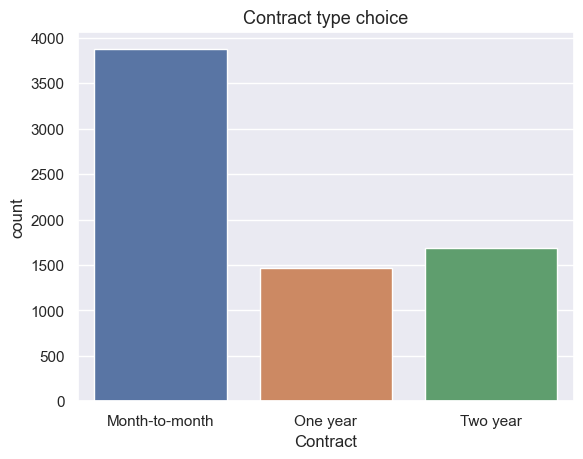

In [456]:
print("PERCENTAGE %")
print(file['Contract'].value_counts(normalize=True).mul(100).round(2))
fig_7=sns.countplot(file,x=file['Contract']);
fig_7.set_title("Contract type choice",fontsize=13);

## Tipo de pagamento utilizado pelos usuários

PERCENTAGE %
Electronic check             33.63
Mailed check                 22.81
Bank transfer (automatic)    21.93
Credit card (automatic)      21.63
Name: PaymentMethod, dtype: float64


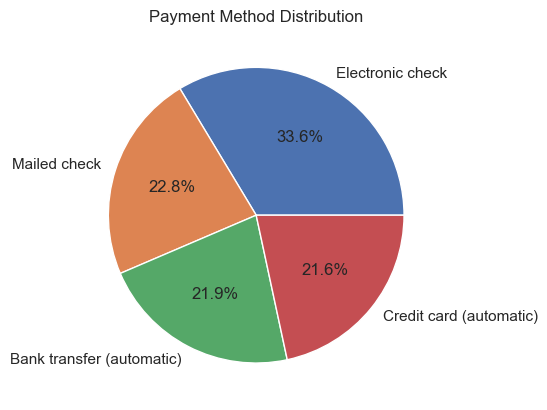

In [441]:
print("PERCENTAGE %")
print(file['PaymentMethod'].value_counts(normalize=True).mul(100).round(2))
plt.pie(file['PaymentMethod'].value_counts(normalize=True).mul(100).round(2),labels=file['PaymentMethod'].unique(),autopct='%1.1f%%');
plt.title("Payment Method Distribution");

## Valor da mensalidade paga por usuários 

###  Com base na distribuição abaixo, constatou-se que o maior número dos usuários pagam uma mensalidade de 18,0  a 25,0

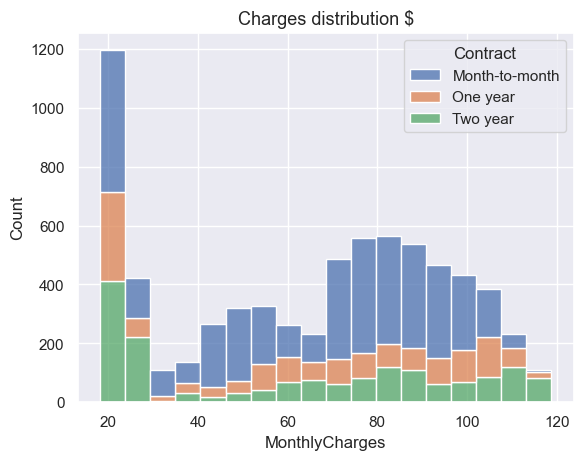

In [460]:
sns.histplot(file,x=file['MonthlyCharges'],hue=file['Contract'],multiple="stack").set_title("Charges distribution $",fontsize=13);

## Nota-se a diferença de tempo que cada usuário passa, com base no tipo de contrato escolhido. (Curto prazo = mensal e longo prazo = anual)

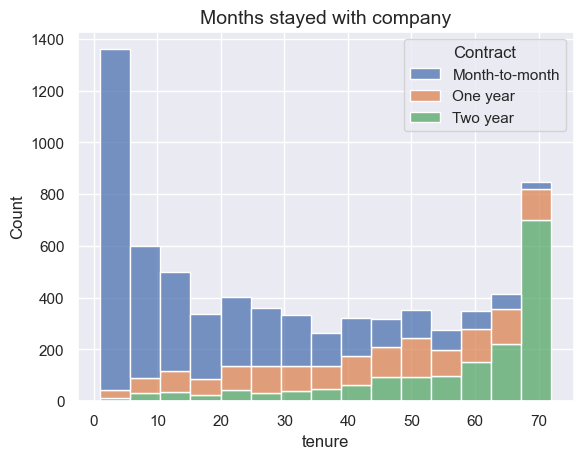

In [464]:
sns.histplot(file,x=file['tenure'],hue=file['Contract'],multiple="stack").set_title("Months stayed with company",fontsize=14);

## Escolhas dos serviços disponibilizados pela empresa

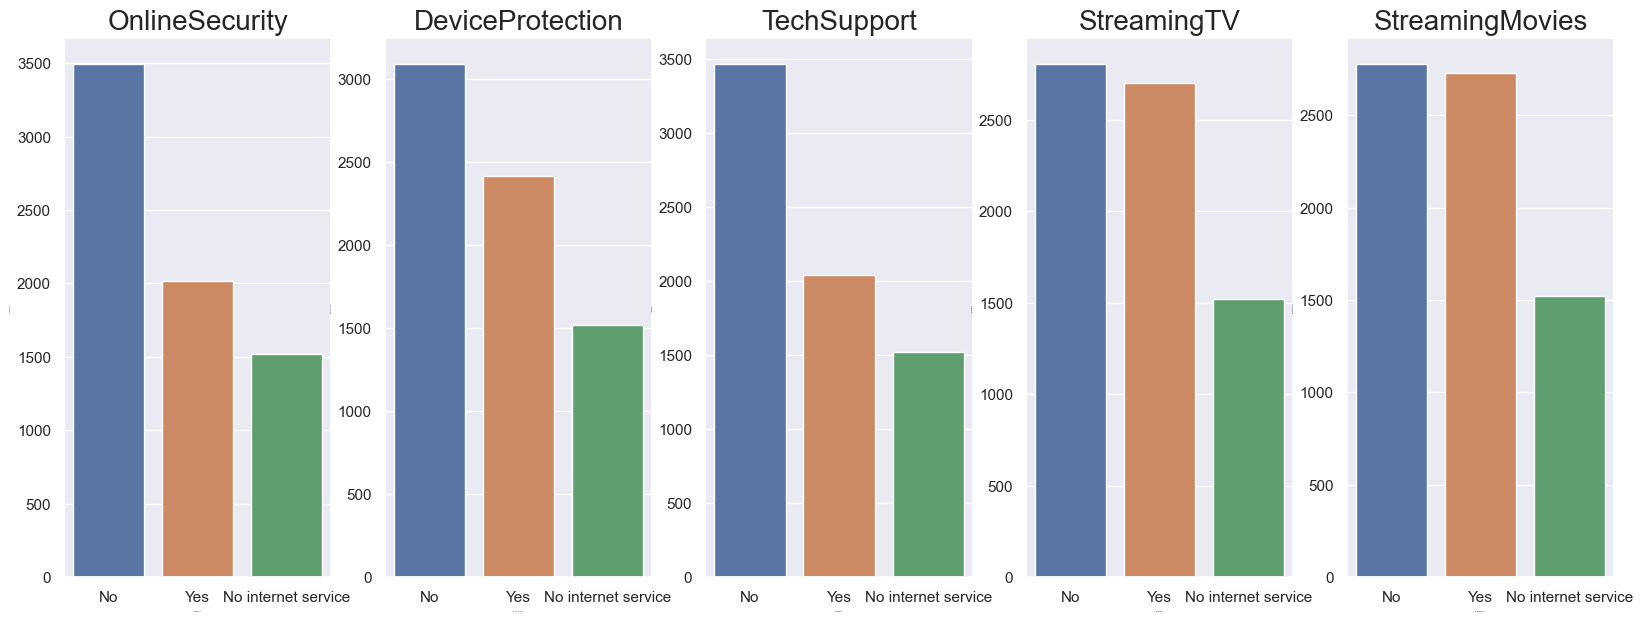

In [481]:
figs,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))
sns.set_theme(palette='deep')

for i,col in enumerate(['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']):
    fig=sns.countplot(data=file,x=col,ax=axs[i])
    fig.set_title(col,fontsize=20)
    fig.set_xlabel(col,fontsize=0)
    fig.set_ylabel(col,fontsize=0)
    

plt.show()

## Percentual de churn: 26.58% dos usuários deixaram a empresa

No     73.42
Yes    26.58
Name: Churn, dtype: float64


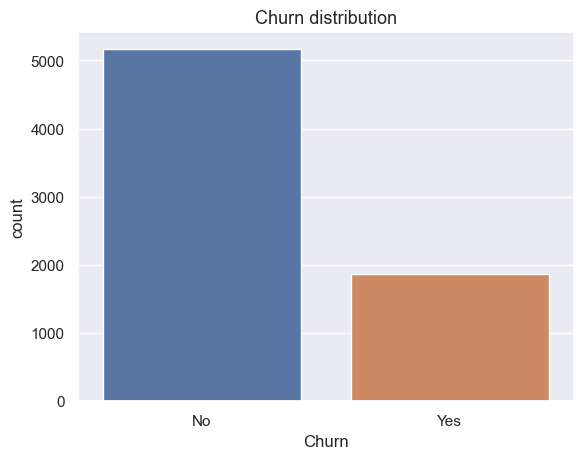

In [495]:
print(file['Churn'].value_counts(normalize=True).mul(100).round(2))
sns.countplot(file,x=file['Churn']).set_title("Churn distribution",fontsize=13);

## Dividindo a base em usuários ativos / usuários que sairam 

In [303]:
Active=file.query("Churn=='No'")
Churns=file.query("Churn=='Yes'")

# Características dos usuários que sairam: 

Not Senior    74.53
Senior        25.47
Name: SeniorCitizen_Label, dtype: float64


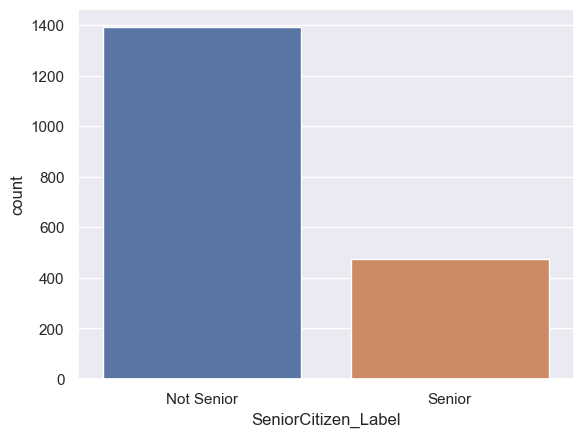

In [484]:
print(Churns['SeniorCitizen_Label'].value_counts(normalize=True).mul(100).round(2))

sns.countplot(Churns,x=Churns['SeniorCitizen_Label']);

## Cerca de 70% utilizou Fibra óptica 

Fiber optic    69.40
DSL            24.56
No              6.05
Name: InternetService, dtype: float64


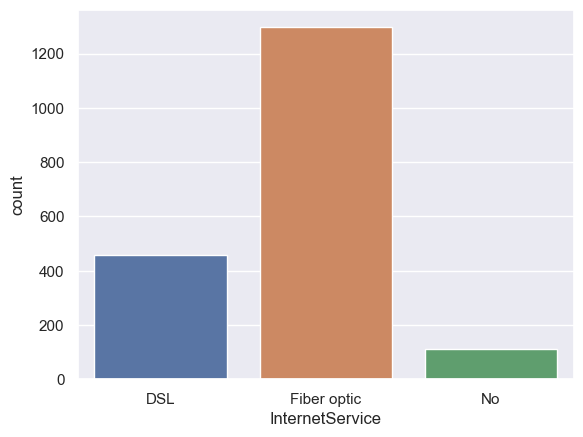

In [485]:
print(Churns['InternetService'].value_counts(normalize=True).mul(100).round(2))
sns.countplot(Churns,x=Churns['InternetService']);

## 90% Possuia serviço de telefonia 

Yes    90.9
No      9.1
Name: PhoneService, dtype: float64


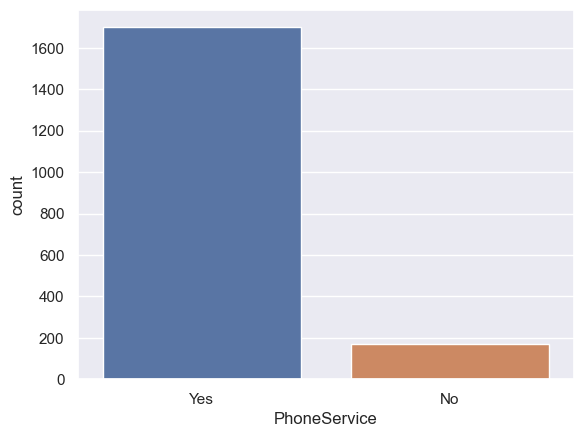

In [486]:
print(Churns['PhoneService'].value_counts(normalize=True).mul(100).round(2))
sns.countplot(Churns,x=Churns['PhoneService']);

## 88% assinou mensalmente

Month-to-month    88.55
One year           8.88
Two year           2.57
Name: Contract, dtype: float64


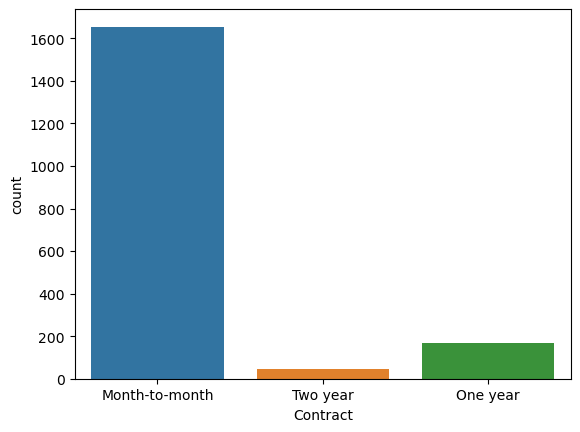

In [307]:
print(Churns['Contract'].value_counts(normalize=True).mul(100).round(2))
sns.countplot(Churns,x=Churns['Contract']);

## A maioria dos usuários que saiu, passou menos que 10 meses com a empresa

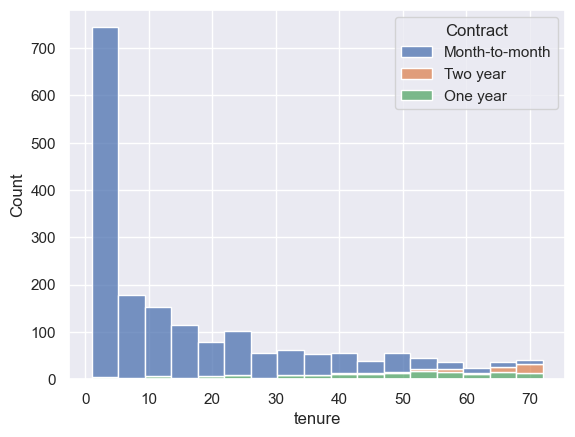

In [489]:
sns.histplot(data=Churns,x=Churns['tenure'],hue=Churns['Contract'],multiple="stack");

## Nota-se que a mensalidade que pagavam era mais cara

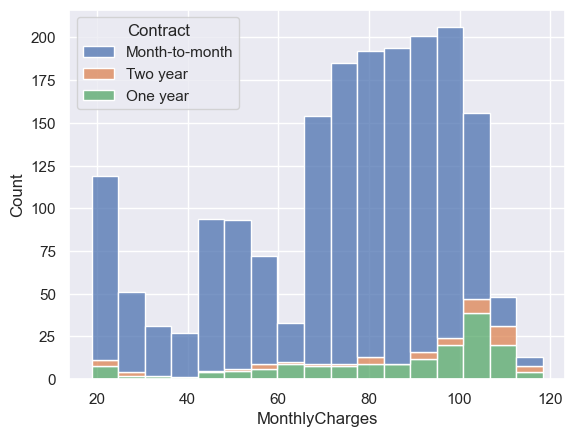

In [576]:
sns.histplot(data=Churns,x=Churns['MonthlyCharges'],hue=Churns['Contract'],multiple="stack");

## Escolha de serviços 

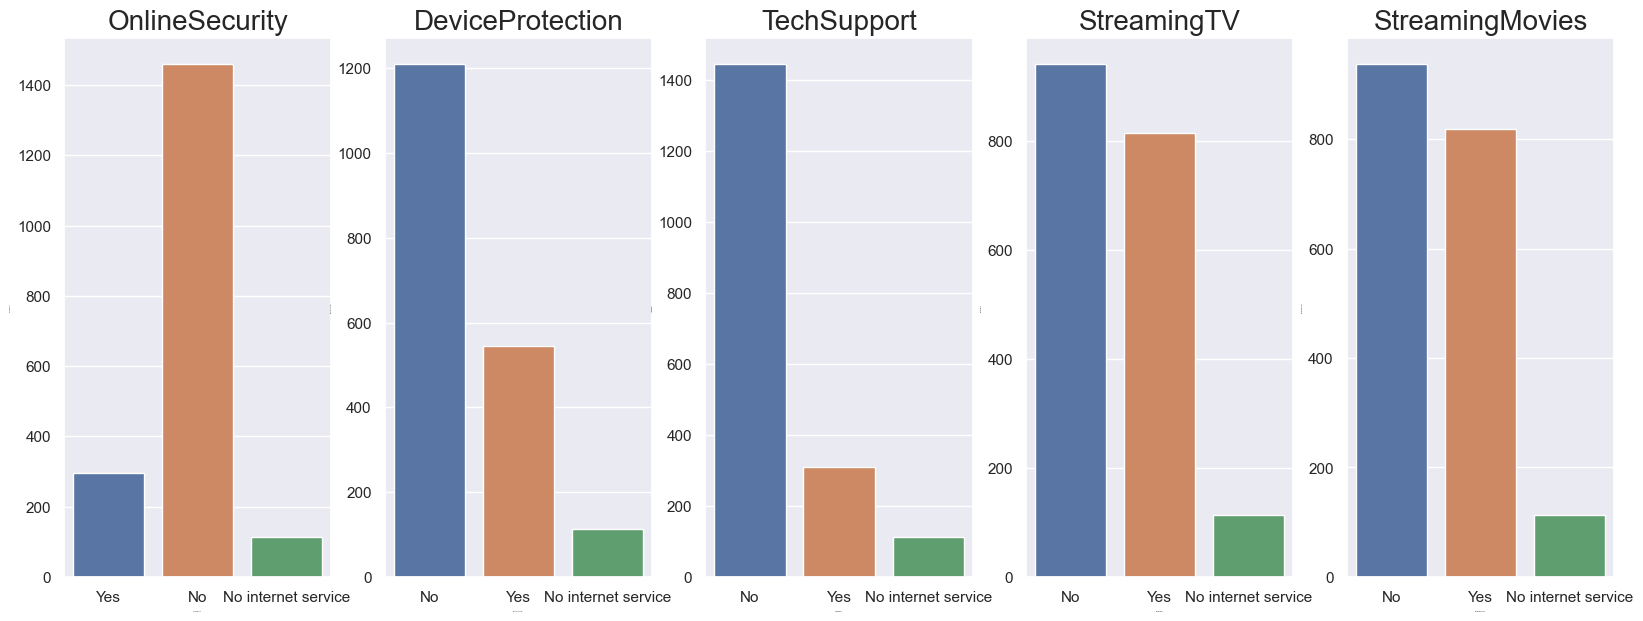

In [577]:
figs,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,7))
sns.set_theme(palette='deep')

for i,col in enumerate(['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']):
    fig=sns.countplot(data=Churns,x=col,ax=axs[i])
    fig.set_title(col,fontsize=20)
    fig.set_xlabel(col,fontsize=0)
    fig.set_ylabel(col,fontsize=0)
    

plt.show()

# Algumas conclusões sobre as análises:

### Um grande número de assinantes dos contratos de 1 ano / 2 anos opta por renova-los após o prazo

### Boa parte dos usuários que cancelaram os serviços com a empresa, estava pagando valores elevados de mensalidade

### Muitos não escolheram serviços de segurança, proteção e assistência técnica, portanto, isso pode ter gerado problemas nas suas experiências

### A maioria estava utilizando fibra óptica para internet, logo, é importante revisar essa área e verificar por algum problema na instalação ou qualidade do material, por exemplo

# Desenvolvimento da máquina

In [497]:
ml_file=file

## Transformar os dados categóricos em numéricos para que a máquina possa processa-los.

In [498]:
# Encoding 1
columns_encoded=[
    'gender',
    'PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaymentMethod','PaymentMethod'

]

ml_file=pd.get_dummies(file,columns=columns_encoded)
ml_file=ml_file.replace({'Yes':0,'No':1,'No internet service':3})
ml_file

,customerID,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,DeviceProtection,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,1,0,1,0,29.85,29.85,...,0,0,0,0,1,0,0,0,1,0
1,5575-GNVDE,0,1,1,34,1,0,1,56.95,1889.50,...,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,1,1,2,0,1,0,53.85,108.15,...,0,0,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,1,1,45,1,0,1,42.30,1840.75,...,1,0,1,0,0,0,1,0,0,0
4,9237-HQITU,0,1,1,2,1,1,0,70.70,151.65,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,0,24,1,0,0,84.80,1990.50,...,1,0,0,0,0,1,0,0,0,1
7039,2234-XADUH,0,0,0,72,0,0,0,103.20,7362.90,...,1,0,0,1,0,0,0,1,0,0
7040,4801-JZAZL,0,0,0,11,1,1,0,29.60,346.45,...,0,0,0,0,1,0,0,0,1,0
7041,8361-LTMKD,1,0,1,4,1,1,0,74.40,306.60,...,0,0,0,0,0,1,0,0,0,1


## Definindo as variáveis independentes e dependente

In [519]:
X=ml_file.loc[:, ~ml_file.columns.isin(['customerID', 'TotalCharges','SeniorCitizen_Label','Churn'])]
Y=ml_file['Churn']

## Dividindo a base para treino e teste

In [520]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

## Escolhendo como algoritmo de classificação: Regressão logística

In [523]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

## Comparando resultado real x resultado da máquina

In [575]:
compare=file[0:10]
compare=compare.drop(columns='SeniorCitizen_Label')
compare['Churn_Prediction']=pd.DataFrame(LR.predict(X[0:10]))
compare['Churn_Prediction']=compare['Churn_Prediction'].replace({0:"Yes",1:"No"})
compare


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Prediction
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,No


## De 10 amostras da base: 7 foram previstas corretamente. 

In [573]:
compare[['Churn','Churn_Prediction']]

,Churn,Churn_Prediction
0,No,Yes
1,No,No
2,Yes,No
3,No,No
4,Yes,Yes
5,Yes,Yes
6,No,Yes
7,No,No
8,Yes,Yes
9,No,No


## Análisando os testes e previsões gerais, a precisão do modelo foi de : 81.23%

In [574]:
from sklearn import metrics
print ((metrics.accuracy_score(Y_test, LR.predict(X_test))*100).round(2))

81.23
